## LeNet-5 
- LeNet-5는 복잡하지 않은 망을 이용하여 (당시 기준)높은 성능을 보여주었을 뿐만 아니라 Convolutional layer와 pooling의 조합을 반복하는 현대적인 CNN 구조를 제안했다는 점에서 의미가 있는 모델
- https://velog.io/@woojinn8/CNN-Network-1.-LeNet

## Visual Geometry Group Net(VGGNet)

- 활성화 함수로 ReLU 사용, Dropout 적용

- 합성곱과 풀링 계층으로 구성된 블록과 분류를 위한 완전 연결계층으로 결합된 전형적인 구조

- 인위적으로 데이터셋을 늘림

- 이미지 변환, 좌우 반전 등의 변환을 시도

- 몇 개의 합성곱 계층과 최대 풀링 계층이 따르는 5개의 블록과 3개의 완전 연결계층으로 구성

- 모든 합성곱과 최대 풀링 계층에 padding='SAME' 적용  
테두리 패딩했기 때문에 출력되는 크기는 입력과 동일해짐

- 합성곱 계층에는 stride=1, 활성화 함수로 ReLU 사용

- 특성맵 깊이를 증가 시킴

- 척도 변경을 통한 데이터 보강(Data Augmentation)

- 3x3 커널을 갖는 두 합성곱 계층을 쌓은 스택이 5x5 커널을 갖는 하나의 합성곱 계층과 동일한 수용영역(ERF)을 가짐

- 11X11 사이즈의 필터 크기를 가지는 AlexNet과 비교하여 더 작은 합성곱 계층을 더 많이 포함해 더 큰 ERF를 얻음

- 이와 같이 합성곱 계층의 개수가 많아지면 매개변수 개수를 줄이고 비선형성을 증가시킴

- VGG-19 아키텍쳐는 VGG-16에 3개의 합성곱 계층을 추가

- LeNet-5, AlexNet, VGG-16, ResNet, Inception Network  
https://wooono.tistory.com/233

## VGG-19 아키텍쳐

  - VGG-16에 3개의 합성곱 계층을 추가

  <br>   

  <img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16.png">
  <center>VGG-16 아키텍쳐</center>

  <sub>[이미지 출처] https://neurohive.io/en/popular-networks/vgg16/ </sub>


<br>

- (참고) ILSVRC의 주요 분류 metric 중 하나는 `top-5`
  
  - 상위 5개 예측 안에 정확한 클래스가 포함되면 제대로 예측한 것으로 간주

  - 일반적인 `top-k` metric의 특정 케이스

In [ ]:
import tensorflow as tf

vgg = tf.keras.applications.VGG16(include_top=True,
                                  weights='imagenet',
                                  input_tensor=None,
                                  input_shape=None,
                                  pooling=None, classes=1000)

vgg.summary()

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
vgg1 = tf.keras.applications.VGG19(include_top=True,
                                  weights='imagenet',
                                  input_tensor=None,
                                  input_shape=None,
                                  pooling=None, classes=1000)

vgg1.summary()

574726144/574710816 [==============================] - 4s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

## GoogLeNet, Inception 모듈
- VGGNet을 제치고 같은 해 분류 과제에서 1등을 차지
- 인셉션 블록이라는 개념을 도입하여 인셉션 네트워크라고도 불림
- Inception Module은 layer에 1x1 Convolution layer를 추가해 bottleneck layer를 구현함으로써, channel 수를 감소시키며, 연산량을 줄이는 구조  
이것이 inception module의 기본 아이디어이며, Inception Network는 이러한 Inception Module의 집합이다.

### GoogLeNet, Inception 모듈

- VGGNet을 제치고 같은 해 분류 과제에서 1등을 차지

- 인셉션 블록이라는 개념을 도입하여, **인셉션 네트워크(Inception Network)**라고도 불림


  <img src="https://miro.medium.com/max/2800/0*rbWRzjKvoGt9W3Mf.png">

  <sub>[이미지 출처] https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5</sub>

  <br>

- 특징 
  
  - CNN 계산 용량을 최적화하는 것을 고려

  - 전형적인 합성곱, 풀링 계층으로 시작하고, 이 정보는 9개의 인셉션 모듈 스택을 통과  
    해당 모듈을 하위 네트워크라고도 함

  - 각 모듈에서 입력 특징 맵은 서로 다른 계층으로 구성된 4개의 병렬 하위 블록에 전달되고, 이를 서로 다시 연결

  - 모든 합성곱과 풀링 계층의 padding옵션은 "SAME"이며 `stride=1`,  
    활성화 함수는 `ReLU` 사용

- 기여

  - 규모가 큰 블록과 병목을 보편화

  - 병목 계층으로 1x1 합성곱 계층 사용

  - 완전 연결 계층 대신 풀링 계층 사용

  - 중간 소실로 경사 소실 문제 해결

  <img src="https://norman3.github.io/papers/images/google_inception/f01.png">

  <sub>[이미지 출처] https://norman3.github.io/papers/docs/google_inception.html</sub>



In [ ]:
inception = tf.keras.applications.InceptionV3(include_top=True,
                                  weights='imagenet',
                                  input_tensor=None,
                                  input_shape=None,
                                  pooling=None, classes=1000)

inception.summary()

96124928/96112376 [==============================] - 4s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)           

## ResNet - 잔차 네트워크
- ResNet은 마이크로소프트에서 개발한 알고리즘이며 깊은 신경망을 제공
- 네트워크의 깊이가 깊어질수록 경사가 소실되거나 폭발하는 문제를 해결하고자 함
- 기존의 망과 차이가 있다면, i+2번째 비선형 함수 입력값에 i 번째 비선형 함수 출력값을 더해줄 수 있도록 지름길(shortcut)을 하나 만들어준다
- 병목 합성곱 계층을 추가하거나 크기가 작은 커널을 사용
- 152개의 훈련 가능한 계층을 수직으로 연결하여 구성
- 모든 합성곱과 풀링 계층에서 패딩옵션으로 'SAME', stride=1 사용
- 3x3 합성곱 계층 다음마다 배치 정규화 적용, 1x1 합성곱 계층에는 활성화 함수가 존재하지 않음

<img src="https://miro.medium.com/max/1200/1*6hF97Upuqg_LdsqWY6n_wg.png">

  <sub>[이미지 출처] https://towardsdatascience.com/review-resnet-winner-of-ilsvrc-2015-image-classification-localization-detection-e39402bfa5d8</sub>


In [ ]:
resnet = tf.keras.applications.ResNet50(include_top=True,
                                  weights='imagenet',
                                  input_tensor=None,
                                  input_shape=None,
                                  pooling=None, classes=1000)

resnet.summary()

102981632/102967424 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

[과제] VGG19를 적용하여 강아지 vs. 고양이 분류 모델 구성 후 성능을 시각화하여 평가하세요.

- 사전 학습 된 모델 적용, 데이터 증식, 미세조정(block 5에 한해서)

In [ ]:
import os, shutil
from google.colab import drive
drive.mount('/content/gdrive')

base = '/content/gdrive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/cats_and_dogs/cad'

train_dir = os.path.join(base, 'train')
val_dir = os.path.join(base, 'validation')
test_dir = os.path.join(base, 'test')

train_cat = os.path.join(train_dir, 'cats')
val_cat = os.path.join(val_dir, 'cats')
test_cat = os.path.join(test_dir, 'cats')

train_dog = os.path.join(train_dir, 'dogs')
val_dog = os.path.join(val_dir, 'dogs')
test_dog = os.path.join(test_dir, 'dogs')

Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.applications import VGG19

vgg19 = VGG19(weights='imagenet',  # 이미지넷에서 학습한 가중치 사용
              include_top=False,  # 별도의 완전연결층 사용할 것이므로 최상위 완전연결층 빼기
              input_shape=(150,150,3)) # 우리 강아지 고양이 데이터셋 사이즈에 맞게 설정

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator as imgen

# 모델 꾸미기
model = models.Sequential()
model.add(vgg19)            # VGG19 추가
model.add(layers.Flatten()) # 평활화
model.add(layers.Dense(256, activation='relu'))  # 은닉 레이어 256개의 은닉 층 1개
model.add(layers.Dense(1, activation='sigmoid')) # 이진 분류를 위한 출력층

In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
# 이미지 증식

train_gen = imgen(rescale = 1./255,
                               rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

val_gen = imgen(rescale=1./255) # 검증용은 증식하지 말고 리스케일만 진행

train_generator = train_gen.flow_from_directory(train_dir,
                                                target_size = (150,150), # 모든 이미지 크기를 150*150으로 변환
                                                batch_size = 20,
                                                class_mode = 'binary')   # 이진 분류이므로 바이너리 모드

val_generator = val_gen.flow_from_directory(val_dir,
                                            target_size = (150,150),
                                            batch_size = 20,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# 최상위 합성곱 층만 동결 해제
vgg19.trainable = True
print(f'동결 전 학습 가중치 수 >>> {len(model.trainable_weights)}')

for i in vgg19.layers:
  if i.name == 'block5_conv1':
    print('최상위 연결층에 도달하여 동결을 멈춥니다.')
    break
  else:   print(f'{i.name} 층 동결 완료');i.trainable = False

print(f'동결 후 학습 가중치 수 >>> {len(model.trainable_weights)}')

동결 전 학습 가중치 수 >>> 36
input_5 층 동결 완료
block1_conv1 층 동결 완료
block1_conv2 층 동결 완료
block1_pool 층 동결 완료
block2_conv1 층 동결 완료
block2_conv2 층 동결 완료
block2_pool 층 동결 완료
block3_conv1 층 동결 완료
block3_conv2 층 동결 완료
block3_conv3 층 동결 완료
block3_conv4 층 동결 완료
block3_pool 층 동결 완료
block4_conv1 층 동결 완료
block4_conv2 층 동결 완료
block4_conv3 층 동결 완료
block4_conv4 층 동결 완료
block4_pool 층 동결 완료
최상위 연결층에 도달하여 동결을 멈춥니다.
동결 후 학습 가중치 수 >>> 12


In [ ]:
# 모델 컴파일 및 학습

model.compile(optimizer = optimizers.RMSprop(learning_rate=1e-5), # 미세조정을 위해 학습률을 조금 낮춤
               loss='binary_crossentropy',
               metrics=['acc'])

h1 = model.fit(train_generator,
               batch_size=20,
               epochs=100,
               validation_data = val_generator)

Epoch 1/100
100/100 [==============================] - 989s 10s/step - loss: 0.4782 - acc: 0.7840 - val_loss: 0.2954 - val_acc: 0.8680
Epoch 2/100
100/100 [==============================] - 19s 192ms/step - loss: 0.3052 - acc: 0.8665 - val_loss: 0.2358 - val_acc: 0.8940
Epoch 3/100
100/100 [==============================] - 19s 194ms/step - loss: 0.2380 - acc: 0.9030 - val_loss: 0.2128 - val_acc: 0.9140
Epoch 4/100
100/100 [==============================] - 20s 196ms/step - loss: 0.2141 - acc: 0.9085 - val_loss: 0.2117 - val_acc: 0.9100
Epoch 5/100
100/100 [==============================] - 19s 192ms/step - loss: 0.1937 - acc: 0.9190 - val_loss: 0.1974 - val_acc: 0.9210
Epoch 6/100
100/100 [==============================] - 19s 192ms/step - loss: 0.1561 - acc: 0.9345 - val_loss: 0.2438 - val_acc: 0.9020
Epoch 7/100
100/100 [==============================] - 20s 195ms/step - loss: 0.1454 - acc: 0.9380 - val_loss: 0.2155 - val_acc: 0.9240
Epoch 8/100
100/100 [============================

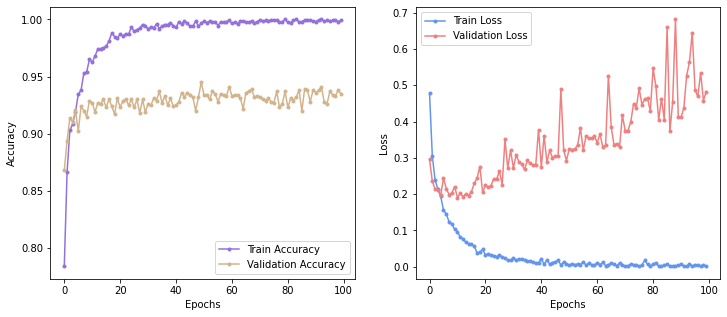

In [ ]:
import matplotlib.pyplot as plt, numpy as np

acc = h1.history['acc']
val_acc = h1.history['val_acc']
loss = h1.history['loss']
val_loss = h1.history['val_loss']

epoch = 100

fig, [ax1, ax2] = plt.subplots(figsize=(12,5), ncols=2)

ax1.plot(np.arange(epoch), acc, color='mediumpurple', marker='o',ms=3, label='Train Accuracy')
ax1.plot(np.arange(epoch), val_acc, color='tan', marker='o',ms=3, label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(np.arange(epoch), loss, color='cornflowerblue', marker='o',ms=3, label='Train Loss')
ax2.plot(np.arange(epoch), val_loss, color='lightcoral', marker='o',ms=3, label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

In [ ]:
def trim(data, factor):
  li = []
  for i in data:
    if li:
      li.append(li[-1]*factor + i*0.1) # 이전에 계산된 이동평균에 factor를 곱하고, 현재 지점에 (1-factor)를 곱한 것이 지수이동평균
    else: li.append(i)
  return li

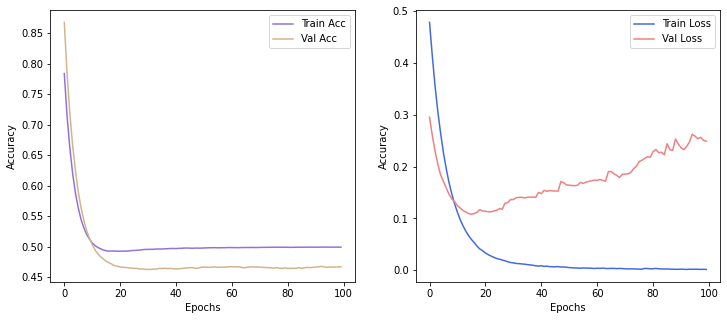

In [ ]:
acc = h1.history['acc']
val_acc = h1.history['val_acc']
loss = h1.history['loss']
val_loss = h1.history['val_loss']

epoch = 100

fig, [ax1, ax2] = plt.subplots(figsize=(12,5), ncols=2)

ax1.plot(range(epoch), trim(acc,0.8), color='mediumpurple', label='Train Acc')
ax1.plot(range(epoch), trim(val_acc,0.8), color='tan', label='Val Acc')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(range(epoch), trim(loss,0.8), color='royalblue', label='Train Loss')
ax2.plot(range(epoch), trim(val_loss,0.8), color='lightcoral', label='Val Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
plt.show()

[과제] 상기 과제에서 미세 조정을 최상위 블록 2개에 대해 적용해서 수행하세요.

In [ ]:
# 모델 꾸미기

vgg19_ = VGG19(weights='imagenet',
              include_top=False,
              input_shape=(150,150,3))

mod = models.Sequential()
mod.add(vgg19_)
mod.add(layers.Flatten())
mod.add(layers.Dense(256, activation='relu'))
mod.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
vgg19_.trainable = True
print(f'동결 전 학습 가중치 수 >>> {len(mod.trainable_weights)}')

for i in vgg19_.layers:
  if i.name == 'block4_conv1':
    print('상위 2개 연결층에 도달하여 동결을 멈춥니다.')
    break
  else:   print(f'{i.name} 층 동결 완료');i.trainable = False

print(f'동결 후 학습 가중치 수 >>> {len(mod.trainable_weights)}')

동결 전 학습 가중치 수 >>> 36
input_6 층 동결 완료
block1_conv1 층 동결 완료
block1_conv2 층 동결 완료
block1_pool 층 동결 완료
block2_conv1 층 동결 완료
block2_conv2 층 동결 완료
block2_pool 층 동결 완료
block3_conv1 층 동결 완료
block3_conv2 층 동결 완료
block3_conv3 층 동결 완료
block3_conv4 층 동결 완료
block3_pool 층 동결 완료
상위 2개 연결층에 도달하여 동결을 멈춥니다.
동결 후 학습 가중치 수 >>> 20


In [ ]:
mod.compile(optimizer = optimizers.RMSprop(learning_rate=1e-5), # 미세조정을 위해 학습률을 조금 낮춤
               loss='binary_crossentropy',
               metrics=['acc'])

h2 = mod.fit(train_generator,
               batch_size=20,
               epochs=100,
               validation_data = val_generator)

Epoch 1/100
100/100 [==============================] - 21s 198ms/step - loss: 0.3859 - acc: 0.8155 - val_loss: 0.2294 - val_acc: 0.9000
Epoch 2/100
100/100 [==============================] - 19s 195ms/step - loss: 0.2075 - acc: 0.9095 - val_loss: 0.2610 - val_acc: 0.8880
Epoch 3/100
100/100 [==============================] - 20s 198ms/step - loss: 0.1764 - acc: 0.9235 - val_loss: 0.1616 - val_acc: 0.9400
Epoch 4/100
100/100 [==============================] - 20s 198ms/step - loss: 0.1377 - acc: 0.9445 - val_loss: 0.2281 - val_acc: 0.9160
Epoch 5/100
100/100 [==============================] - 19s 193ms/step - loss: 0.1053 - acc: 0.9640 - val_loss: 0.1341 - val_acc: 0.9460
Epoch 6/100
100/100 [==============================] - 20s 198ms/step - loss: 0.0971 - acc: 0.9650 - val_loss: 0.1284 - val_acc: 0.9460
Epoch 7/100
100/100 [==============================] - 20s 195ms/step - loss: 0.0823 - acc: 0.9700 - val_loss: 0.1212 - val_acc: 0.9510
Epoch 8/100
100/100 [===========================

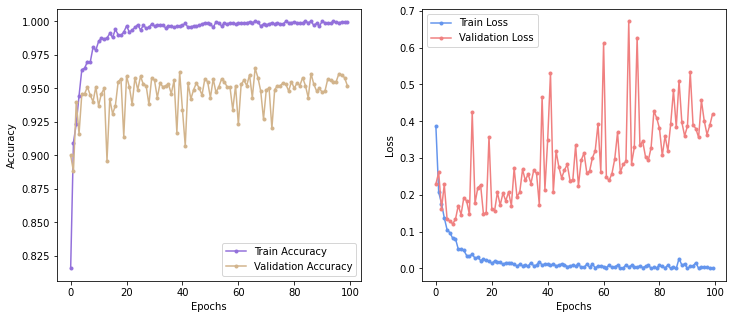

In [ ]:
acc = h2.history['acc']
val_acc = h2.history['val_acc']
loss = h2.history['loss']
val_loss = h2.history['val_loss']

epoch = 100

fig, [ax1, ax2] = plt.subplots(figsize=(12,5), ncols=2)

ax1.plot(np.arange(epoch), acc, color='mediumpurple', marker='o',ms=3, label='Train Accuracy')
ax1.plot(np.arange(epoch), val_acc, color='tan', marker='o',ms=3, label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(np.arange(epoch), loss, color='cornflowerblue', marker='o',ms=3, label='Train Loss')
ax2.plot(np.arange(epoch), val_loss, color='lightcoral', marker='o',ms=3, label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

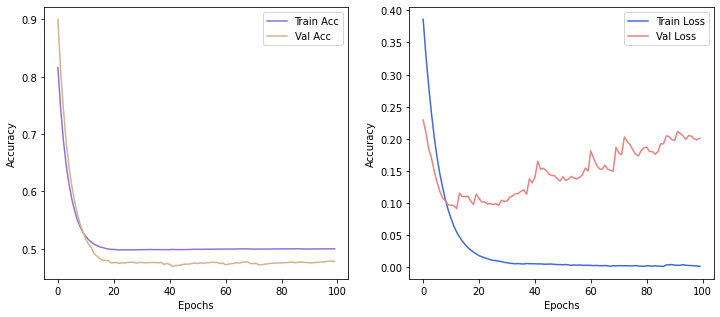

In [ ]:
fig, [ax1, ax2] = plt.subplots(figsize=(12,5), ncols=2)


ax1.plot(range(epoch), trim(acc,0.8), color='mediumpurple', label='Train Acc')
ax1.plot(range(epoch), trim(val_acc,0.8), color='tan', label='Val Acc')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(range(epoch), trim(loss,0.8), color='royalblue', label='Train Loss')
ax2.plot(range(epoch), trim(val_loss,0.8), color='lightcoral', label='Val Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
plt.show()